In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [3]:
# Hyperparameters
batch_size = 64
learning_rate = 0.01
num_epochs = 10

In [4]:
# MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std of MNIST
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [13]:

# Neural Network Model (Simple CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        # print("forward output shape", x.shape)
        return x

model = CNN()

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [14]:
# Training the model
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # print("data shape", data.shape)
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        if batch_idx % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch: {epoch+1}, Batch: {batch_idx+1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0


In [15]:
# Evaluate the model
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

In [16]:
# Main
for epoch in range(num_epochs):
    train(model, train_loader, criterion, optimizer, epoch)
    evaluate(model, test_loader)
    
print('Finished Training')

Epoch: 1, Batch: 100, Loss: 0.655
Epoch: 1, Batch: 200, Loss: 0.338
Epoch: 1, Batch: 300, Loss: 0.326
Epoch: 1, Batch: 400, Loss: 0.288
Epoch: 1, Batch: 500, Loss: 0.253
Epoch: 1, Batch: 600, Loss: 0.238
Epoch: 1, Batch: 700, Loss: 0.216
Epoch: 1, Batch: 800, Loss: 0.205
Epoch: 1, Batch: 900, Loss: 0.187
Test Accuracy: 94.97%
Epoch: 2, Batch: 100, Loss: 0.170
Epoch: 2, Batch: 200, Loss: 0.156
Epoch: 2, Batch: 300, Loss: 0.152
Epoch: 2, Batch: 400, Loss: 0.148
Epoch: 2, Batch: 500, Loss: 0.131
Epoch: 2, Batch: 600, Loss: 0.142
Epoch: 2, Batch: 700, Loss: 0.144
Epoch: 2, Batch: 800, Loss: 0.126
Epoch: 2, Batch: 900, Loss: 0.118
Test Accuracy: 96.61%
Epoch: 3, Batch: 100, Loss: 0.094
Epoch: 3, Batch: 200, Loss: 0.104
Epoch: 3, Batch: 300, Loss: 0.096
Epoch: 3, Batch: 400, Loss: 0.104
Epoch: 3, Batch: 500, Loss: 0.098
Epoch: 3, Batch: 600, Loss: 0.091
Epoch: 3, Batch: 700, Loss: 0.092
Epoch: 3, Batch: 800, Loss: 0.082
Epoch: 3, Batch: 900, Loss: 0.089


KeyboardInterrupt: 

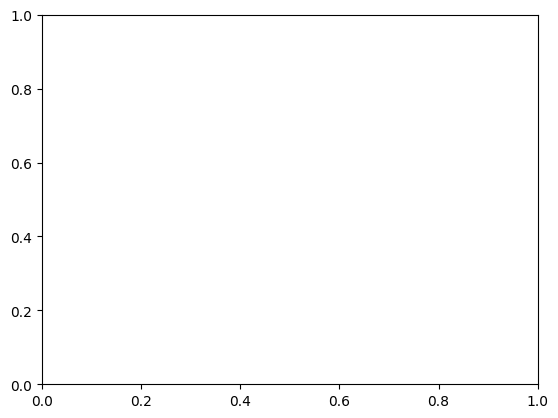

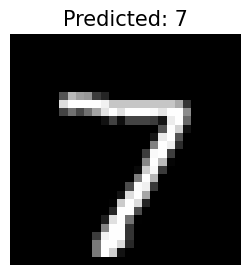

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

# Ensure the model is in evaluation mode
model.eval()

# Define a function to display an image and its corresponding prediction
def display_image_with_prediction(index):
    image, label = test_dataset[index]
    image = image.unsqueeze(0)
    
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)
        predicted_label = predicted.item()
        
    plt.figure(figsize=(3, 3))
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.title(f'Predicted: {predicted_label}', fontsize=15)
    plt.axis('off')
    plt.show()

# Initialize the current image index
current_index = 0

# Function to handle key press events
def on_key(event):
    global current_index
    if event.key == ' ':  # Spacebar key
        current_index = (current_index + 1) % len(test_dataset)
        clear_output(wait=True)
        display_image_with_prediction(current_index)

# Set up the interactive display
fig, ax = plt.subplots()
fig.canvas.mpl_connect('key_press_event', on_key)

# Display the first image
display_image_with_prediction(current_index)